In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications import VGG16

In [2]:
dataset_dir = "D:\\nakul\\PICT\\sem7\\DL\\caltech-101-img\\caltech-101-img"

In [3]:
dataset_datagen = ImageDataGenerator(
    rescale = 1.0/255
)

In [5]:
dataset_generator = dataset_datagen.flow_from_directory(
    dataset_dir,
    target_size = (64,64),
    batch_size=2000,
)

Found 9144 images belonging to 102 classes.


In [6]:
xtrain,ytrain = dataset_generator[0]
xtest,ytest = dataset_generator[1]

In [7]:
print(len(xtrain))

2000


In [8]:
weights_path = "D:\\nakul\\PICT\\sem7\\DL\\vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5"

In [9]:
base_model = VGG16(weights=weights_path,include_top=False,input_shape=(64,64,3))

In [10]:
for layer in base_model.layers:
    layer.trainable = False

In [11]:
x = Flatten()(base_model.output)
x = Dense(64,activation='relu')(x)
x = Dense(102,activation='softmax')(x)

In [12]:
model = Model(inputs=base_model.input,outputs=x)

In [13]:
model.compile(optimizer = 'adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [16]:
model.fit(xtrain,ytrain,batch_size=64,epochs=1,validation_data=(xtest,ytest))

32/32 ━━━━━━━━━━━━━━━━━━━━ 66s 2s/step - accuracy: 0.4558 - loss: 2.5526 - val_accuracy: 0.4385 - val_loss: 2.7018


In [19]:
base_model = VGG16(weights=weights_path, include_top=False, input_shape=(64, 64, 3))

# freeze all layers first
for layer in base_model.layers:
   layer.trainable = False
    
# unfreeze last 4 layers of base model
for layer in base_model.layers[len(base_model.layers) - 4:]:
   layer.trainable = True
    
# fine-tuning hyper parameters
x = Flatten()(base_model.output)
x = Dense(512, activation='relu')(x)
x = tf.keras.layers.Dropout(0.3)(x)
x = Dense(102, activation='softmax')(x)

# Create the model
model = Model(inputs=base_model.input, outputs=x)
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
# training fine tuned model
model.fit(xtrain, ytrain, batch_size=64, epochs=1, validation_data=(xtest, ytest))

32/32 ━━━━━━━━━━━━━━━━━━━━ 76s 2s/step - accuracy: 0.0877 - loss: 4.4723 - val_accuracy: 0.1965 - val_loss: 3.6618


In [20]:
import matplotlib.pyplot as plt
ypred = model.predict(xtest)


63/63 ━━━━━━━━━━━━━━━━━━━━ 35s 550ms/step


In [21]:
labels = list(dataset_generator.class_indices.keys())

predicted Faces
actual anchor


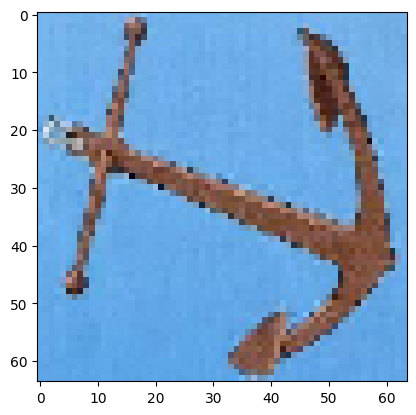

In [24]:
plt.imshow(xtest[887])
print("predicted",labels[np.argmax(ypred[887])])
print("actual",labels[np.argmax(ytest[887])])